In [38]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

In [5]:
bank_data=pd.read_csv('./bank.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank_data.deposit.value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [8]:
y=bank_data.deposit

In [9]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
pank_data.drop(columns=['deposit','poutcome'],inplace=True)

In [13]:
x=pank_data

In [14]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0


In [15]:
encoder=LabelEncoder()

In [18]:
#pank_data['jop']=encoder.fit_transform(pank_data['job'])
#ممكن اعمل الطريقه دى او امشى ع الداتا بالطريقه التانيه اللى هى  for loob

In [16]:
for i in x.columns:
    x[i]=encoder.fit_transform(x[i])

In [17]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0


In [19]:
y=encoder.fit_transform(y)

In [20]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=199)

In [23]:
model=SVC(C=1.0,kernel='rbf',degree=3,gamma='scale')

In [24]:
model.fit(x_train,y_train)

SVC()

In [25]:
y_pred=model.predict(x_test)

In [27]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     13478
           1       0.03      0.56      0.06        86

    accuracy                           0.88     13564
   macro avg       0.51      0.72      0.50     13564
weighted avg       0.99      0.88      0.93     13564



In [34]:
x.iloc[1].values

array([ 26,   9,   2,   1,   0, 945,   1,   0,   2,   4,   8, 151,   0,
         0,   0], dtype=int64)

In [35]:
model.predict([[26,   9,   2,   1,   0, 945,   1,   0,   2,   4,   8, 151,   0,
         0,   0]])

E:\program\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [36]:
cm=metrics.confusion_matrix(y_pred,y_test)

In [37]:
cm

array([[11875,  1603],
       [   38,    48]], dtype=int64)

In [39]:
y_test=pd.Series(y_test)

In [40]:
y_test.value_counts()

0    11913
1     1651
dtype: int64

<Axes: >

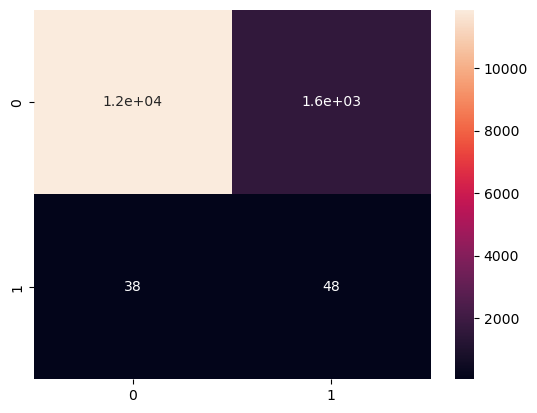

In [41]:
sns.heatmap(cm,annot=True)